### Adidas US Sales 

In [142]:
                                                  # importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,StackingRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

In [143]:
df=pd.read_excel("C:/Users/saran/Downloads/Adidas US Sales Datasets.xlsx")  #loading the csv file
df

Unnamed: 0   Unnamed: 1             Unnamed: 2           Unnamed: 3  \
0            NaN          NaN  Adidas Sales Database                  NaN   
1            NaN          NaN                    NaN                  NaN   
2            NaN          NaN                    NaN                  NaN   
3            NaN     Retailer            Retailer ID         Invoice Date   
4            NaN  Foot Locker                1185732  2020-01-01 00:00:00   
...          ...          ...                    ...                  ...   
9647         NaN  Foot Locker                1185732  2021-01-24 00:00:00   
9648         NaN  Foot Locker                1185732  2021-01-24 00:00:00   
9649         NaN  Foot Locker                1185732  2021-02-22 00:00:00   
9650         NaN  Foot Locker                1185732  2021-02-22 00:00:00   
9651         NaN  Foot Locker                1185732  2021-02-22 00:00:00   

     Unnamed: 4     Unnamed: 5  Unnamed: 6               Unnamed: 7  \
0           NaN            NaN         NaN                      NaN   
1           NaN            NaN         NaN                      NaN   
2           NaN            NaN         NaN                      NaN   
3        Region          State        City                  Product   
4     Northeast       New York    New York    Men's Street Footwear   
...         ...            ...         ...                      ...   
9647  Northeast  New Hampshire  Manchester            Men's Apparel   
9648  Northeast  New Hampshire  Manchester          Women's Apparel   
9649  Northeast  New Hampshire  Manchester    Men's Street Footwear   
9650  Northeast  New Hampshire  Manchester  Men's Athletic Footwear   
9651  Northeast  New Hampshire  Manchester  Women's Street Footwear   

          Unnamed: 8  Unnamed: 9  Unnamed: 10       Unnamed: 11  \
0                NaN         NaN          NaN               NaN   
1                NaN         NaN          NaN               NaN   
2                NaN         NaN          NaN               NaN   
3     Price per Unit  Units Sold  Total Sales  Operating Profit   
4                 50        1200       600000            300000   
...              ...         ...          ...               ...   
9647              50          64         3200             896.0   
9648              41         105         4305            1377.6   
9649              41         184         7544           2791.28   
9650              42          70         2940            1234.8   
9651              29          83         2407            649.89   

           Unnamed: 12   Unnamed: 13  
0                  NaN           NaN  
1                  NaN           NaN  
2                  NaN           NaN  
3     Operating Margin  Sales Method  
4                  0.5      In-store  
...                ...           ...  
9647              0.28        Outlet  
9648              0.32        Outlet  
9649              0.37        Outlet  
9650              0.42        Outlet  
9651              0.27        Outlet  

[9652 rows x 14 columns]

In [144]:
df=df.drop([0,1,2],axis=0)              #dropping the first 3 rows with null values and resetting index
df=df.drop('Unnamed: 0',axis=1)
df=df.reset_index()
df.head()

index   Unnamed: 1   Unnamed: 2           Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0      3     Retailer  Retailer ID         Invoice Date     Region      State   
1      4  Foot Locker      1185732  2020-01-01 00:00:00  Northeast   New York   
2      5  Foot Locker      1185732  2020-01-02 00:00:00  Northeast   New York   
3      6  Foot Locker      1185732  2020-01-03 00:00:00  Northeast   New York   
4      7  Foot Locker      1185732  2020-01-04 00:00:00  Northeast   New York   

  Unnamed: 6                 Unnamed: 7      Unnamed: 8  Unnamed: 9  \
0       City                    Product  Price per Unit  Units Sold   
1   New York      Men's Street Footwear              50        1200   
2   New York    Men's Athletic Footwear              50        1000   
3   New York    Women's Street Footwear              40        1000   
4   New York  Women's Athletic Footwear              45         850   

   Unnamed: 10       Unnamed: 11       Unnamed: 12   Unnamed: 13  
0  Total Sales  Operating Profit  Operating Margin  Sales Method  
1       600000            300000               0.5      In-store  
2       500000            150000               0.3      In-store  
3       400000            140000              0.35      In-store  
4       382500            133875              0.35      In-store

In [145]:
df=df.drop('index',axis=1)                  ## dropping index column


In [146]:
headers=df.iloc[0]                                 #setting the row with column names 

df.columns=headers
df=df.drop(labels=0,axis=0)
df=df.reset_index()
df

0     index     Retailer Retailer ID         Invoice Date     Region  \
0         1  Foot Locker     1185732  2020-01-01 00:00:00  Northeast   
1         2  Foot Locker     1185732  2020-01-02 00:00:00  Northeast   
2         3  Foot Locker     1185732  2020-01-03 00:00:00  Northeast   
3         4  Foot Locker     1185732  2020-01-04 00:00:00  Northeast   
4         5  Foot Locker     1185732  2020-01-05 00:00:00  Northeast   
...     ...          ...         ...                  ...        ...   
9643   9644  Foot Locker     1185732  2021-01-24 00:00:00  Northeast   
9644   9645  Foot Locker     1185732  2021-01-24 00:00:00  Northeast   
9645   9646  Foot Locker     1185732  2021-02-22 00:00:00  Northeast   
9646   9647  Foot Locker     1185732  2021-02-22 00:00:00  Northeast   
9647   9648  Foot Locker     1185732  2021-02-22 00:00:00  Northeast   

0             State        City                    Product Price per Unit  \
0          New York    New York      Men's Street Footwear             50   
1          New York    New York    Men's Athletic Footwear             50   
2          New York    New York    Women's Street Footwear             40   
3          New York    New York  Women's Athletic Footwear             45   
4          New York    New York              Men's Apparel             60   
...             ...         ...                        ...            ...   
9643  New Hampshire  Manchester              Men's Apparel             50   
9644  New Hampshire  Manchester            Women's Apparel             41   
9645  New Hampshire  Manchester      Men's Street Footwear             41   
9646  New Hampshire  Manchester    Men's Athletic Footwear             42   
9647  New Hampshire  Manchester    Women's Street Footwear             29   

0    Units Sold Total Sales Operating Profit Operating Margin Sales Method  
0          1200      600000           300000              0.5     In-store  
1          1000      500000           150000              0.3     In-store  
2          1000      400000           140000             0.35     In-store  
3           850      382500           133875             0.35     In-store  
4           900      540000           162000              0.3     In-store  
...         ...         ...              ...              ...          ...  
9643         64        3200            896.0             0.28       Outlet  
9644        105        4305           1377.6             0.32       Outlet  
9645        184        7544          2791.28             0.37       Outlet  
9646         70        2940           1234.8             0.42       Outlet  
9647         83        2407           649.89             0.27       Outlet  

[9648 rows x 14 columns]

In [147]:
df.isnull().sum()           #checking for nulll values

0
index               0
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [148]:
df.duplicated().sum()       # checking duplicated values

0

In [149]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month

In [150]:
df

0     index     Retailer Retailer ID Invoice Date     Region          State  \
0         1  Foot Locker     1185732   2020-01-01  Northeast       New York   
1         2  Foot Locker     1185732   2020-01-02  Northeast       New York   
2         3  Foot Locker     1185732   2020-01-03  Northeast       New York   
3         4  Foot Locker     1185732   2020-01-04  Northeast       New York   
4         5  Foot Locker     1185732   2020-01-05  Northeast       New York   
...     ...          ...         ...          ...        ...            ...   
9643   9644  Foot Locker     1185732   2021-01-24  Northeast  New Hampshire   
9644   9645  Foot Locker     1185732   2021-01-24  Northeast  New Hampshire   
9645   9646  Foot Locker     1185732   2021-02-22  Northeast  New Hampshire   
9646   9647  Foot Locker     1185732   2021-02-22  Northeast  New Hampshire   
9647   9648  Foot Locker     1185732   2021-02-22  Northeast  New Hampshire   

0           City                    Product Price per Unit Units Sold  \
0       New York      Men's Street Footwear             50       1200   
1       New York    Men's Athletic Footwear             50       1000   
2       New York    Women's Street Footwear             40       1000   
3       New York  Women's Athletic Footwear             45        850   
4       New York              Men's Apparel             60        900   
...          ...                        ...            ...        ...   
9643  Manchester              Men's Apparel             50         64   
9644  Manchester            Women's Apparel             41        105   
9645  Manchester      Men's Street Footwear             41        184   
9646  Manchester    Men's Athletic Footwear             42         70   
9647  Manchester    Women's Street Footwear             29         83   

0    Total Sales Operating Profit Operating Margin Sales Method  Year  Month  
0         600000           300000              0.5     In-store  2020      1  
1         500000           150000              0.3     In-store  2020      1  
2         400000           140000             0.35     In-store  2020      1  
3         382500           133875             0.35     In-store  2020      1  
4         540000           162000              0.3     In-store  2020      1  
...          ...              ...              ...          ...   ...    ...  
9643        3200            896.0             0.28       Outlet  2021      1  
9644        4305           1377.6             0.32       Outlet  2021      1  
9645        7544          2791.28             0.37       Outlet  2021      2  
9646        2940           1234.8             0.42       Outlet  2021      2  
9647        2407           649.89             0.27       Outlet  2021      2  

[9648 rows x 16 columns]

In [151]:
df.to_csv('C:/Users/saran/OneDrive/Documents/adidas1.csv')       #exporting to csv file 

In [152]:
df=df.drop(columns=['index','Retailer ID','Invoice Date'])         # dropping unrequited columns 

In [153]:
df.shape              #checking the dimension and size of dataset

(9648, 13)

In [154]:
df.info()                  # checking column info and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Region            9648 non-null   object
 2   State             9648 non-null   object
 3   City              9648 non-null   object
 4   Product           9648 non-null   object
 5   Price per Unit    9648 non-null   object
 6   Units Sold        9648 non-null   object
 7   Total Sales       9648 non-null   object
 8   Operating Profit  9648 non-null   object
 9   Operating Margin  9648 non-null   object
 10  Sales Method      9648 non-null   object
 11  Year              9648 non-null   int64 
 12  Month             9648 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 980.0+ KB


In [155]:
df.describe(exclude='number')          #summary statistics

0          Retailer Region       State      City                Product  \
count          9648   9648        9648      9648                   9648   
unique            6      5          50        52                      6   
top     Foot Locker   West  California  Portland  Men's Street Footwear   
freq           2637   2448         432       360                   1610   

0       Price per Unit  Units Sold  Total Sales  Operating Profit  \
count           9648.0        9648       9648.0            9648.0   
unique           146.0         361       3512.0            6510.0   
top               50.0         225     100000.0           21000.0   
freq             557.0         207         52.0              34.0   

0       Operating Margin Sales Method  
count            9648.00         9648  
unique            127.00            3  
top                 0.35       Online  
freq             1229.00         4889

In [179]:
def seperate_data_types(df):    # deifining function to segregate categorical and numerical columns for efficient visualization
    categorical=[]
    numerical=[]
    for column in df.columns:
        if df[column].nunique()<60:
            categorical.append(column)
        else:
            numerical.append(column)
    return categorical, numerical

categorical, numerical = seperate_data_types(df)

table=[categorical,numerical]
print(tabulate({"Categorical":categorical,
              "Numerical":numerical},headers=["Categorical","Continuous"]))

Categorical    Continuous
-------------  ----------------
Retailer       Price per Unit
Region         Units Sold
State          Total Sales
City           Operating Profit
Product        Operating Margin
Sales Method
Year
Month


In [157]:
#df.to_csv('C:/Users/saran/OneDrive/Documents/adidas.csv')

In [158]:
import mysql.connector as sql
from sqlalchemy import create_engine

In [159]:
# host='localhost'
# user='root'
# password='MSqlpass%4023'
# db='adidas'

In [160]:
#engine=create_engine("mysql://{user}:{pw}@{host}/{db}".format(host=host,db=db,pw=password,user=user))

In [161]:
#df.to_sql("sales2",engine,index=False)

### EDA

In [162]:
def count(col):
    plt.figure(figsize=(22, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=75)
    plt.title(f'Count Plot of {col}')
    plt.show()

In [163]:
def pie(col):
    plt.figure(figsize=(22, 4))
    plt.subplot(1, 2, 2)
    df_counts = df[col].value_counts()
    plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.show()

### UNIVARIATE ANALYSIS

In [164]:
categorical

['Retailer',
 'Region',
 'State',
 'City',
 'Product',
 'Sales Method',
 'Year',
 'Month']

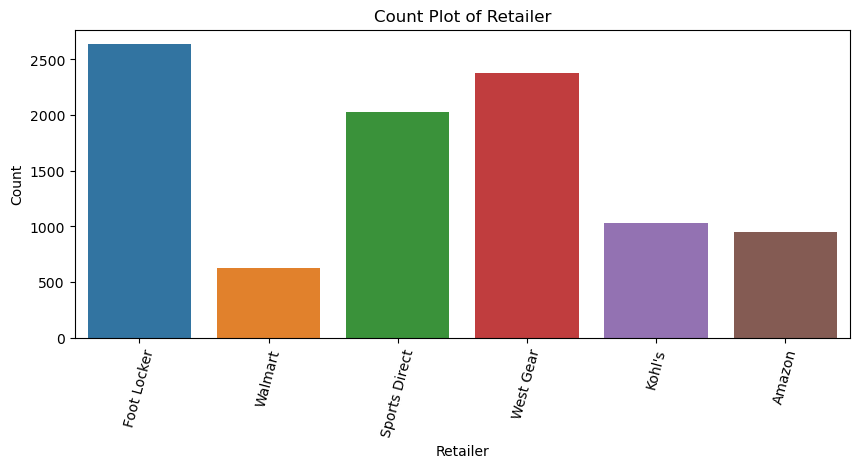

In [165]:
count('Retailer')

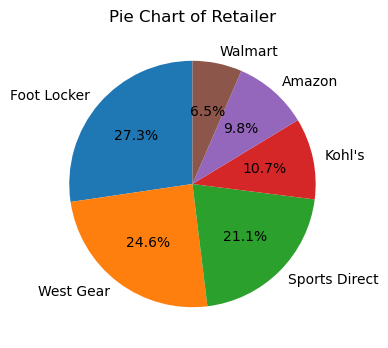

In [166]:
pie('Retailer')

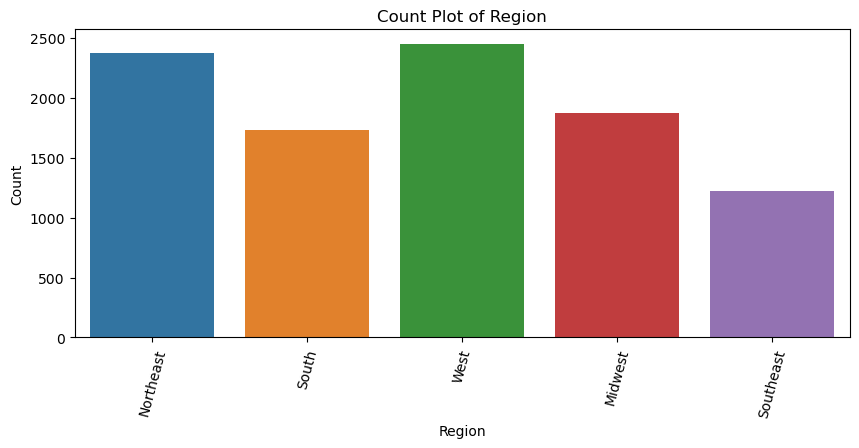

In [167]:
count('Region')

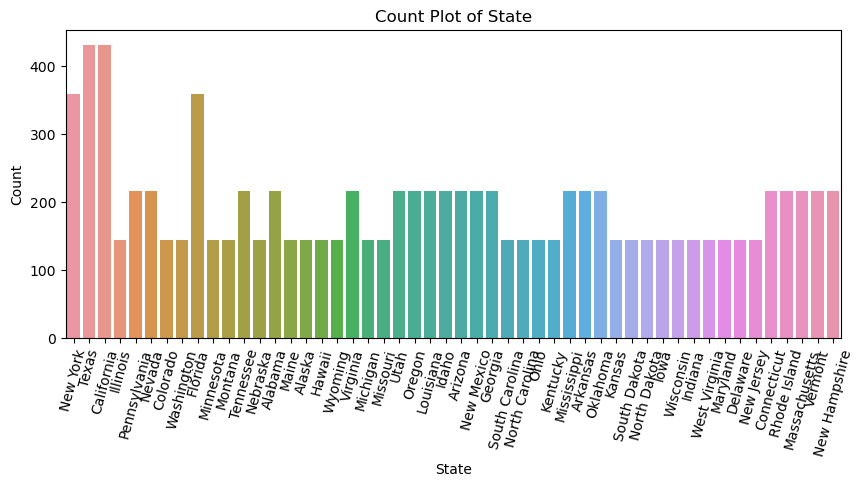

In [168]:
count('State')

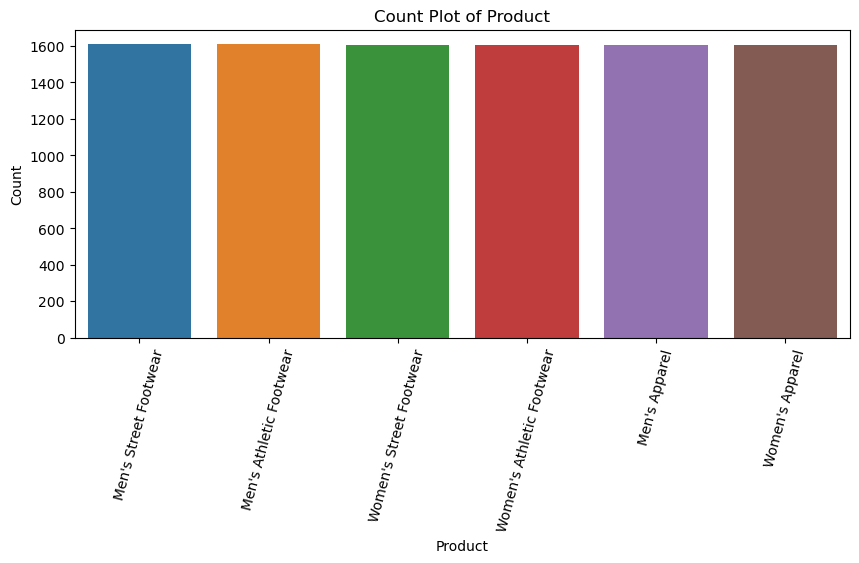

In [169]:
count('Product')

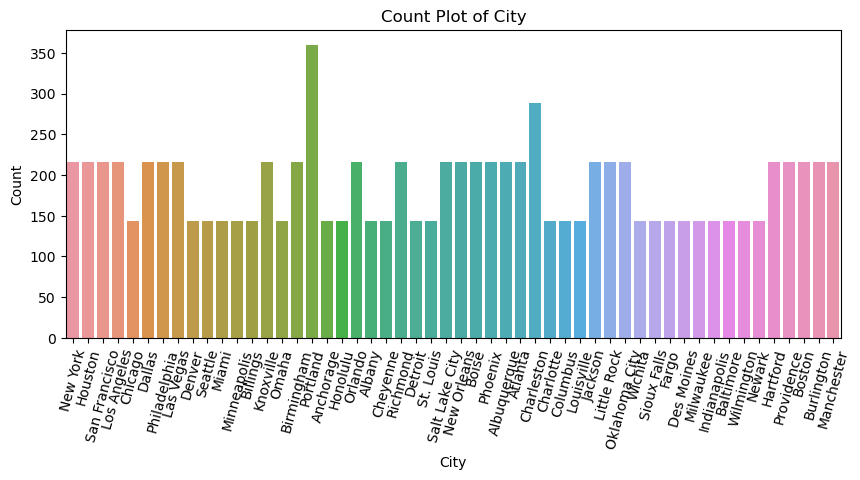

In [170]:
count('City')

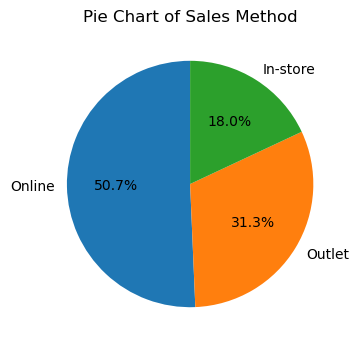

In [171]:
pie("Sales Method")

In [172]:
def hist(*s):                           #defining function to plot continuous data columns
    for i in numerical:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=i, kde=True)
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {i}')

        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, y=i)
        plt.ylabel(i)
        plt.title(f'Box Plot of {i}')
        plt.show()

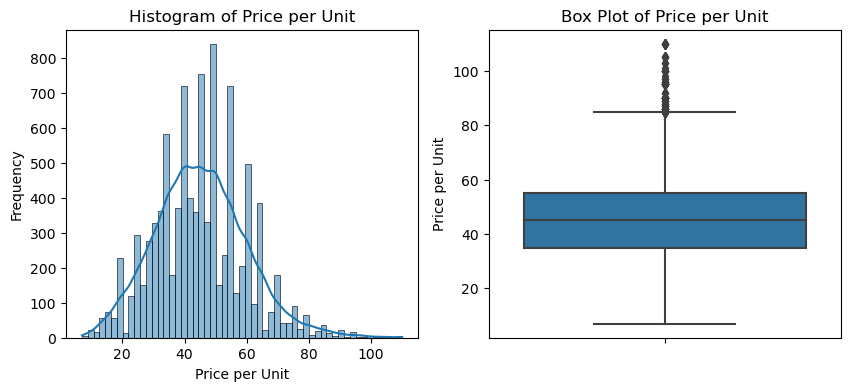

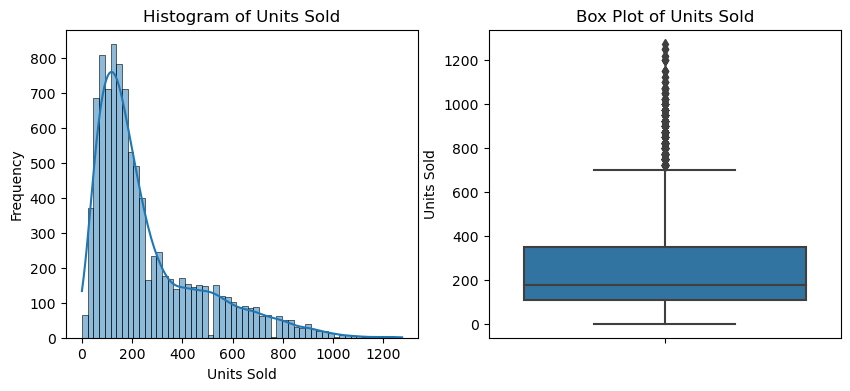

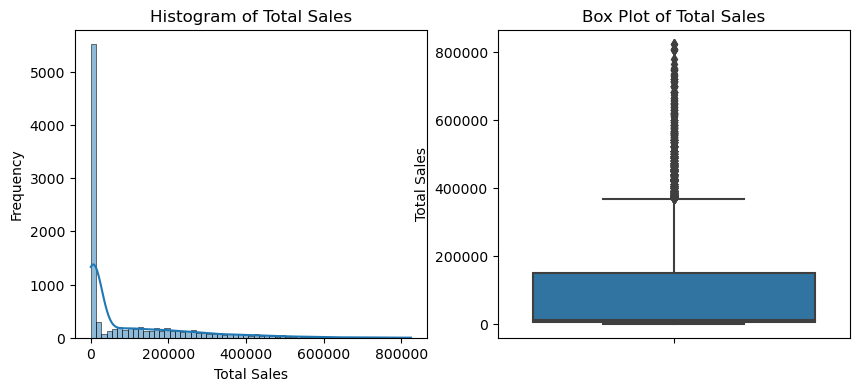

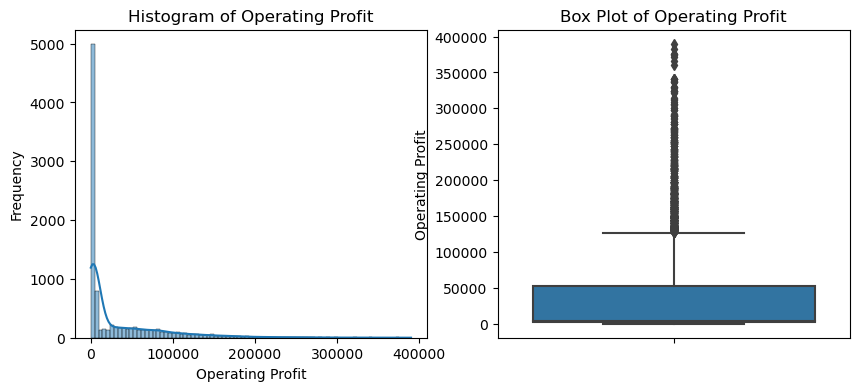

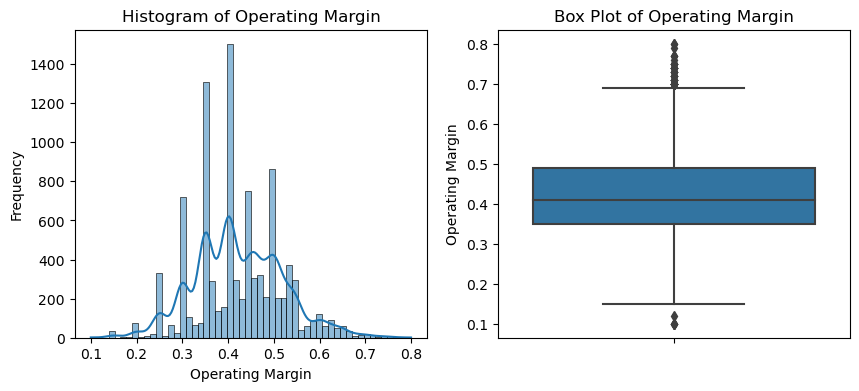

In [173]:
hist(numerical)

Text(0.5, 0, 'price')

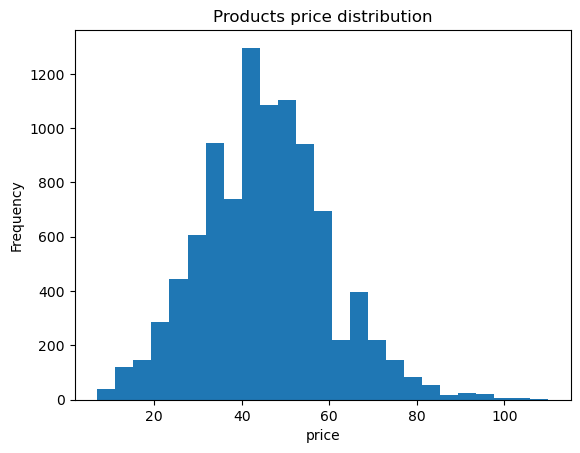

In [174]:
df['Price per Unit'].plot(kind='hist',bins=25,title='Products price distribution')
plt.xlabel('price')

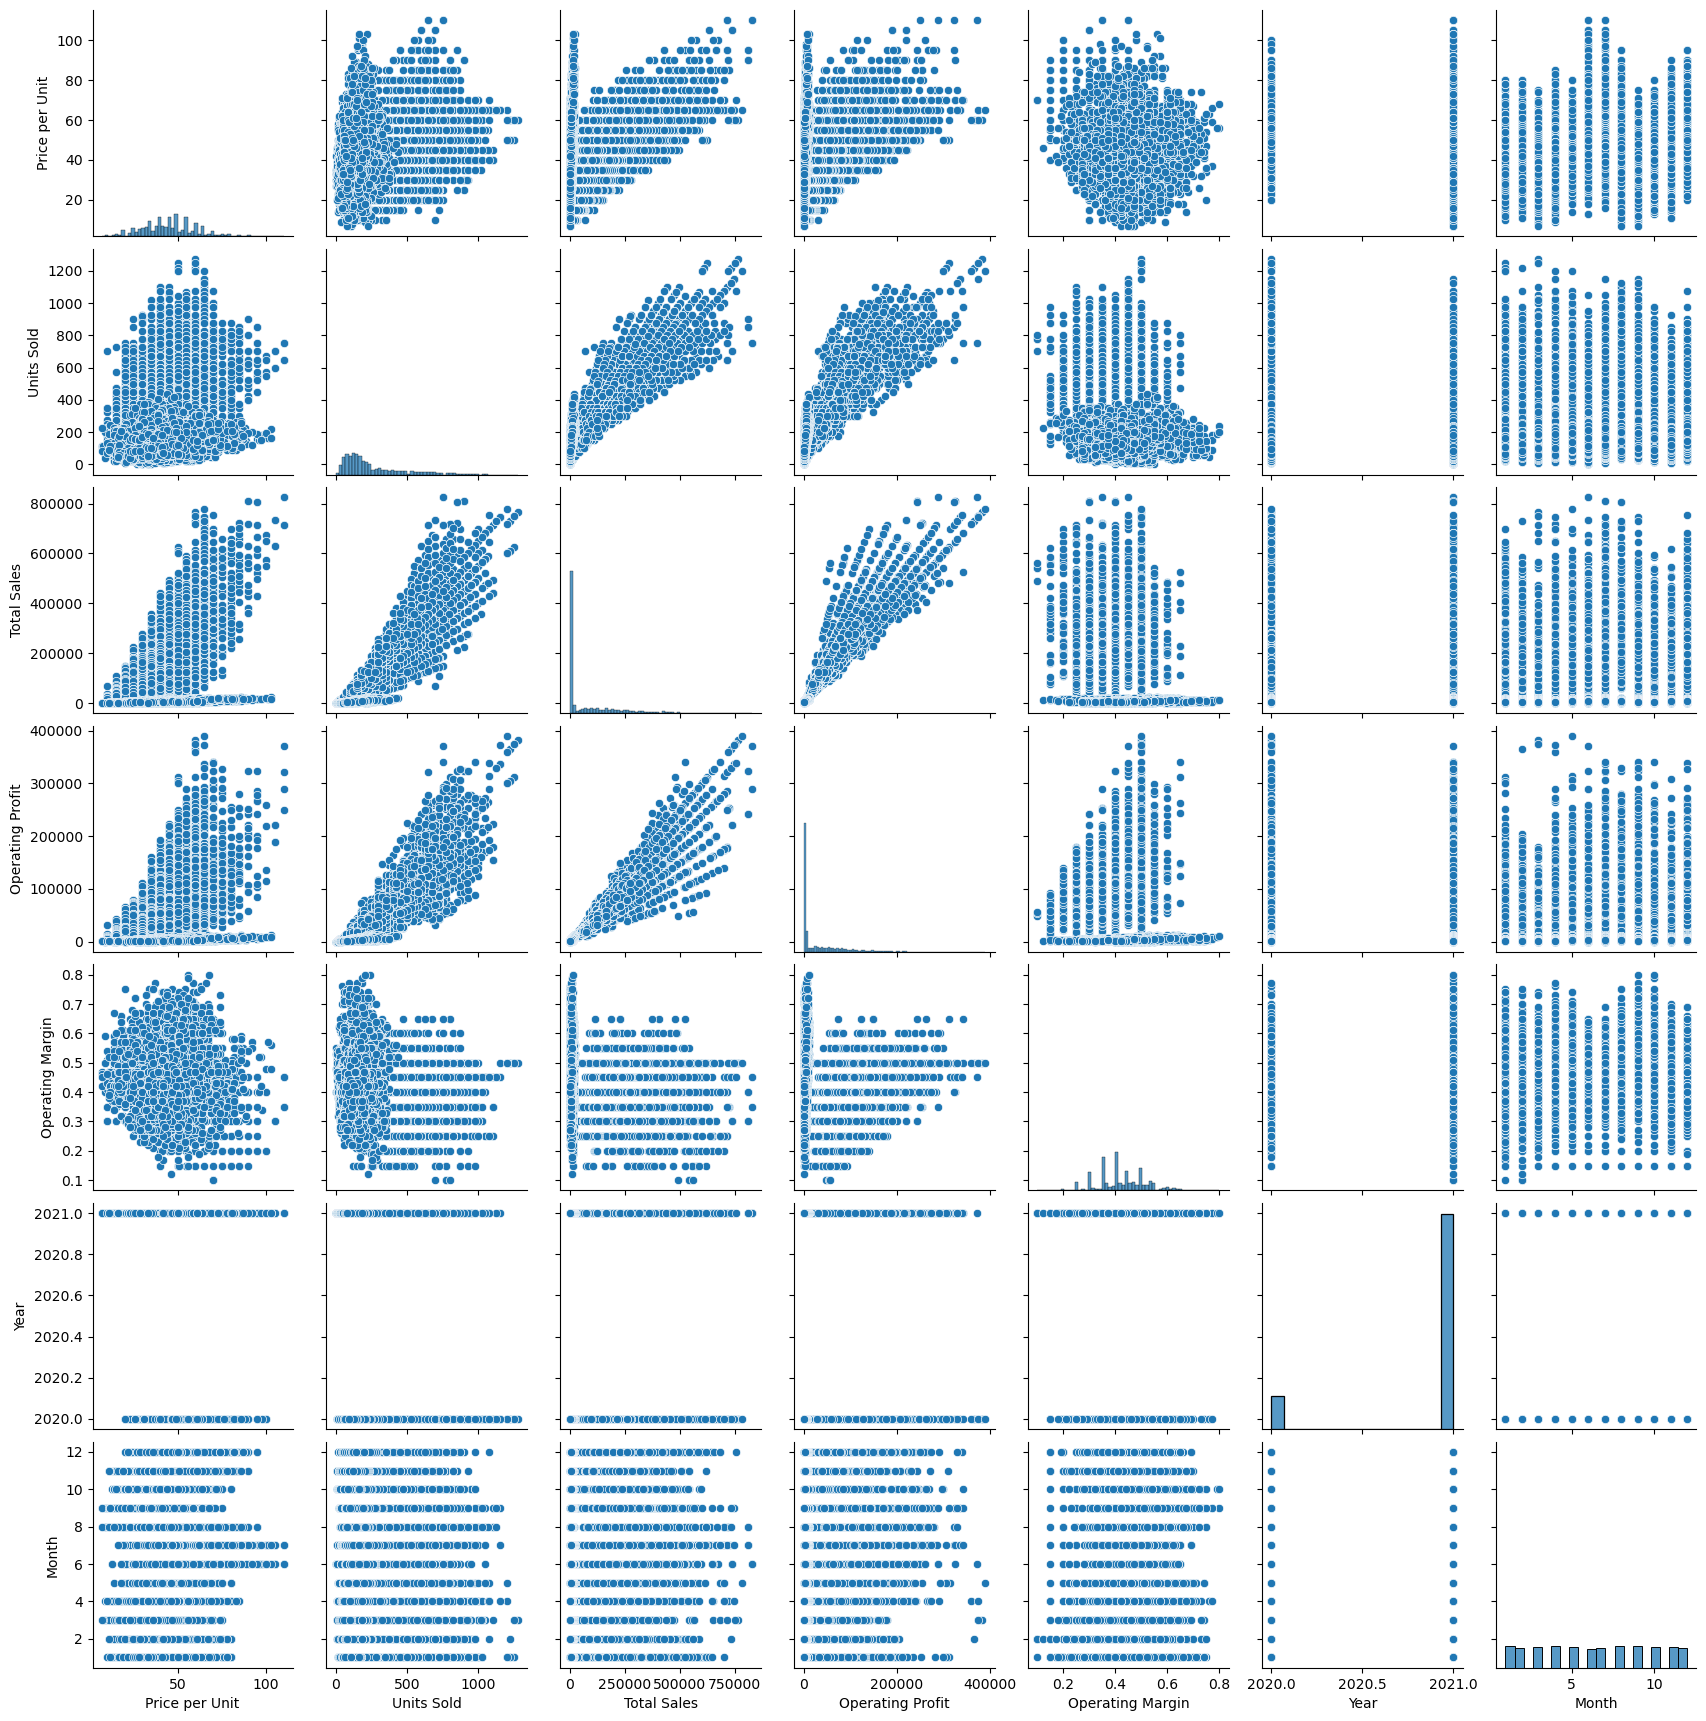

In [175]:
sns.pairplot(df)

### Inference

##### Most number of purchases are in the west region and in cities of Texas and California.
##### Footlocker is the retailer with highest count .
##### Online is the most preferred mode of shopping.
##### West gear Retailer is the most preffered one.
#### Although there appear to be outliers according to box plot, they are continuous values.


### Bivariate Analysis

##### How does the sales method vary across different retailers?

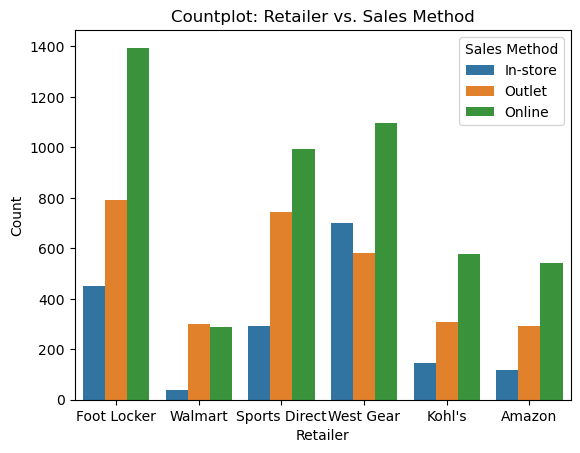

In [28]:
sns.countplot(x='Retailer', hue='Sales Method', data=df)
plt.xlabel('Retailer')
plt.ylabel('Count')
plt.title('Countplot: Retailer vs. Sales Method')
plt.show()

##### Which retailer is the most preffered in different regions?

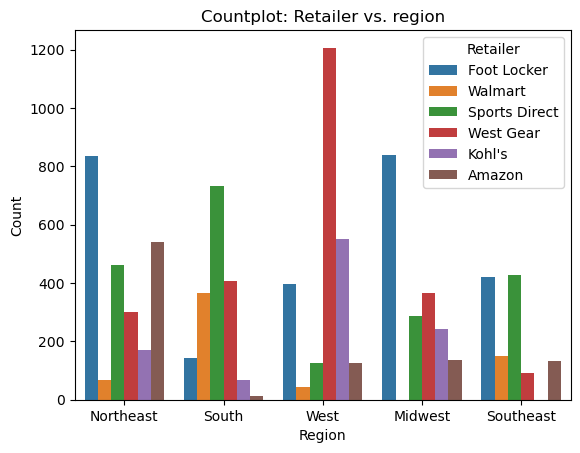

In [29]:
sns.countplot(hue='Retailer', x='Region', data=df)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Countplot: Retailer vs. region')
plt.show()

##### Which product is most sold in different regions?

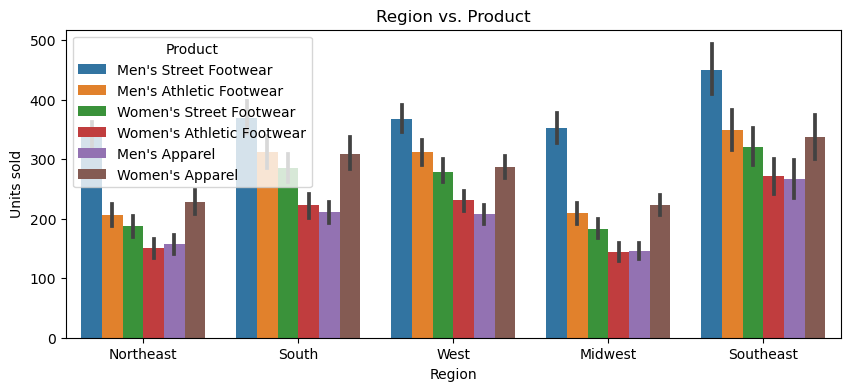

In [185]:
plt.figure(figsize=(10,4))
sns.barplot(x='Region',y='Units Sold', hue='Product', data=df)
plt.xlabel('Region')
plt.ylabel('Units sold')
plt.title('Region vs. Product')
plt.show()

#### Which products have the highest and lowest total sales?

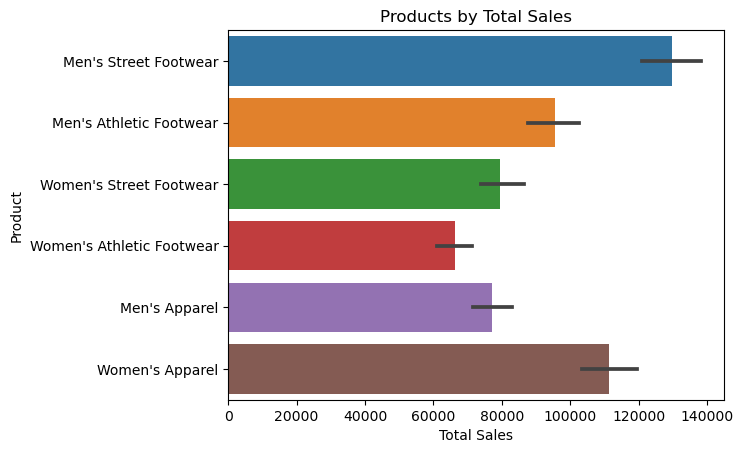

In [31]:
sns.barplot(y='Product', x='Total Sales', data=df,orient='h')
plt.ylabel('Product')
plt.xlabel('Total Sales')
plt.title('Products by Total Sales')
plt.show()

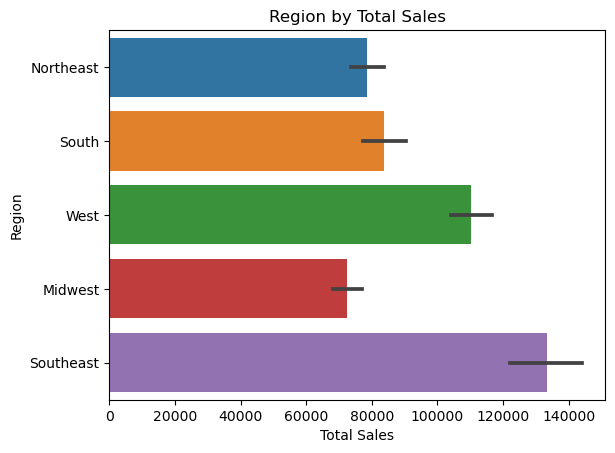

In [186]:
sns.barplot(y='Region', x='Total Sales', data=df,orient='h')
plt.ylabel('Region')
plt.xlabel('Total Sales')
plt.title('Region by Total Sales')
plt.show()

##### Which sales methods is most prefered for different product categories?

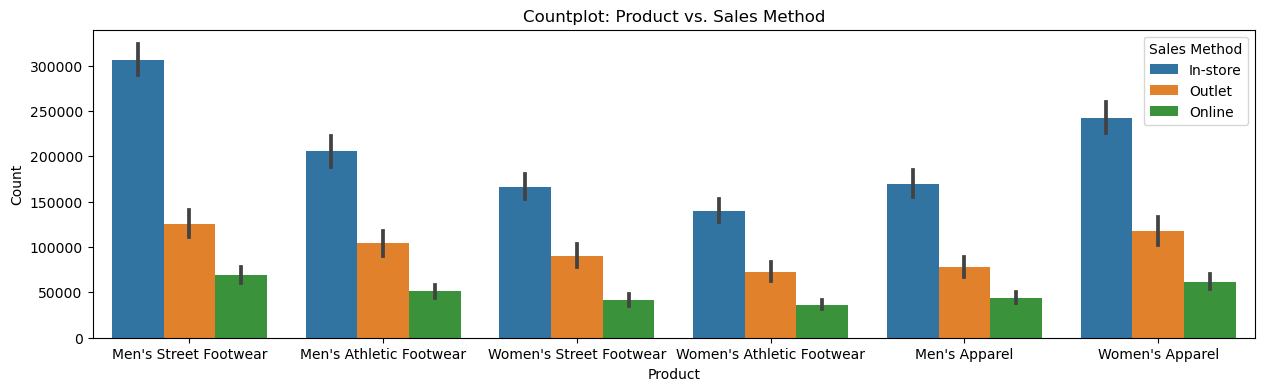

In [187]:
plt.figure(figsize=(15,4))
sns.barplot(x='Product', y='Total Sales',hue='Sales Method', data=df)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Countplot: Product vs. Sales Method')
plt.show()

###### West Gear is the most preferred retailer in the region of west, while Foot locker is the most preferred in northeast Midwest and souteast. ###### Sports direct is also ahighly preferred retailer in southeast.
###### Online is the most common sales method for all retailers and products.
###### Men’s Street footwear is the top product by sales while Women’s athletic footwear is the least.
###### SouthEast is the region with highest amount of sales.



### How does the sales vary over month and year

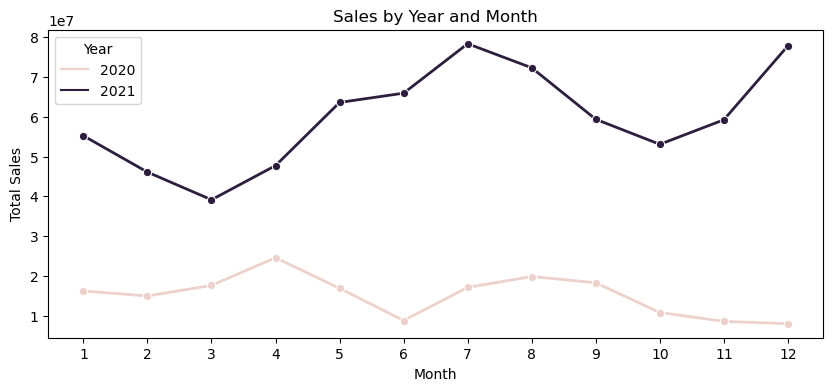

In [133]:
year_month = df.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()
year_month = year_month.sort_values(['Year', 'Month'])

plt.figure(figsize=(10, 4))
sns.lineplot(data=year_month, x='Month', y='Total Sales', hue='Year', marker='o', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Year and Month')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.show()

#### Sales of various products over years

<Figure size 2400x600 with 0 Axes>

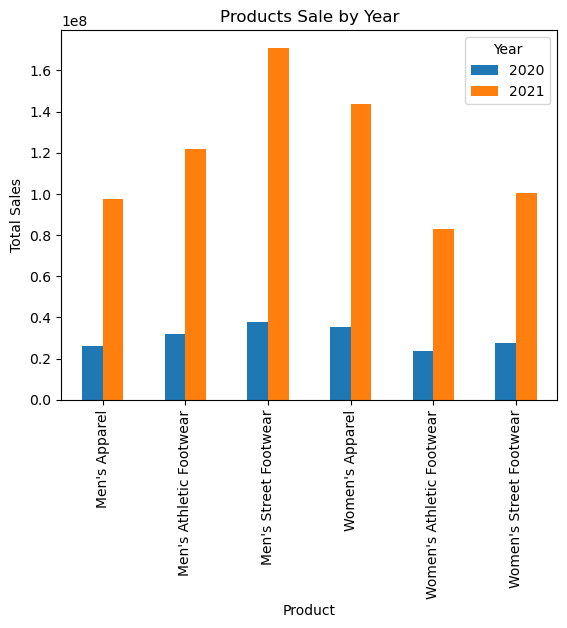

In [132]:
year_product = df.groupby(['Year', 'Product'])['Total Sales'].sum().reset_index()
product_sale = year_product.pivot(index='Product', columns='Year', values='Total Sales')


plt.figure(figsize=(24, 6))

product_sale.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Products Sale by Year')
plt.legend(title='Year')
plt.show()

##### Products of which price range of products haves old most number of units?


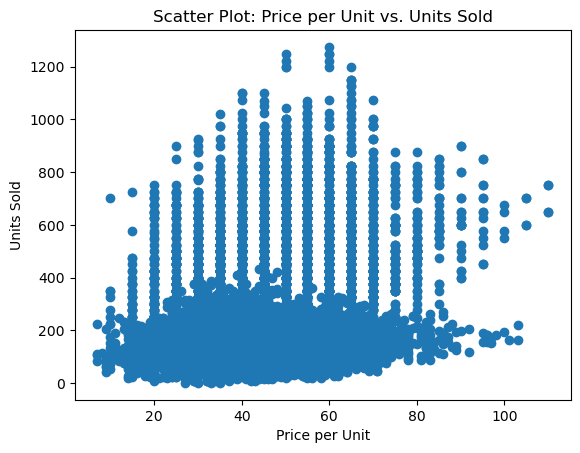

In [41]:
plt.scatter(df['Price per Unit'], df['Units Sold'])
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.title('Scatter Plot: Price per Unit vs. Units Sold')
plt.show()

In [ ]:
##Products of all price range are being sold well. But Products of moderate price range are sold most compared to other.

#### How are units sold and the total sales related?

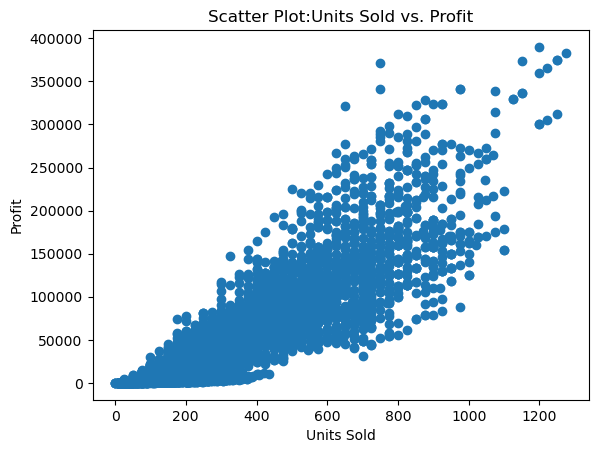

In [136]:
plt.scatter(df['Units Sold'], df['Operating Profit'])
plt.xlabel('Units Sold')
plt.ylabel('Profit')
plt.title('Scatter Plot:Units Sold vs. Profit')
plt.show()

#### Sales and operating profit for each region

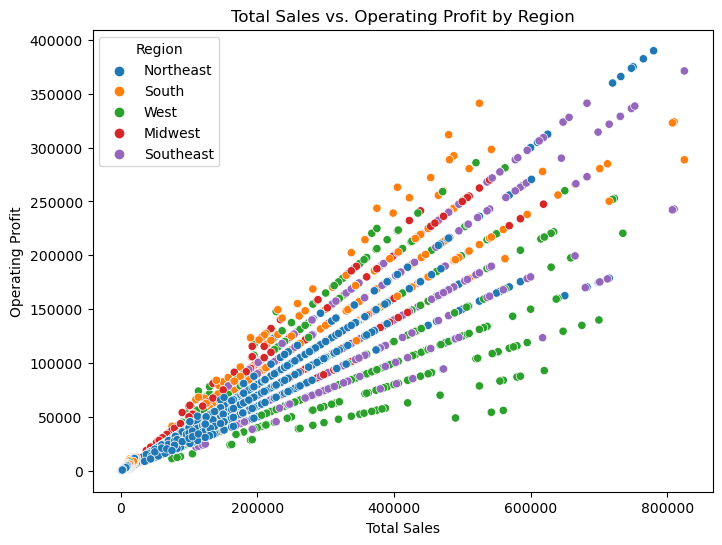

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total Sales', y='Operating Profit', hue='Region')
plt.title('Total Sales vs. Operating Profit by Region')
plt.xlabel('Total Sales')
plt.ylabel('Operating Profit')
plt.show()

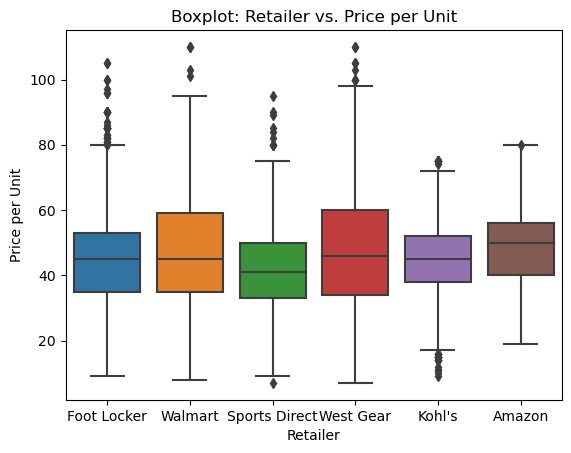

In [44]:
sns.boxplot(x='Retailer', y='Price per Unit', data=df)
plt.xlabel('Retailer')
plt.ylabel('Price per Unit')
plt.title('Boxplot: Retailer vs. Price per Unit')
plt.show()

#### Which region has highest operating profit?

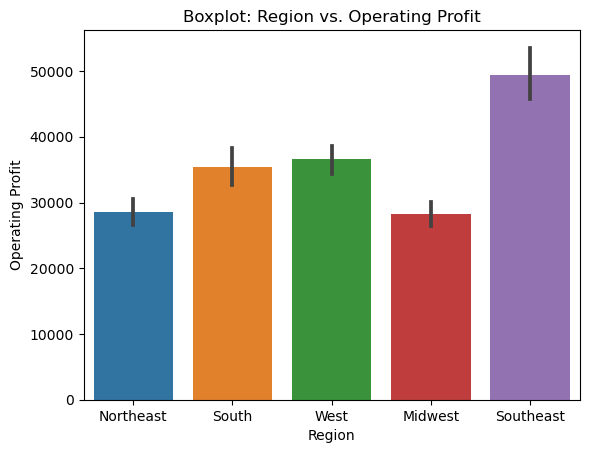

In [45]:
sns.barplot(x='Region', y='Operating Profit', data=df)
plt.xlabel('Region')
plt.ylabel('Operating Profit')
plt.title('Boxplot: Region vs. Operating Profit')
plt.show()

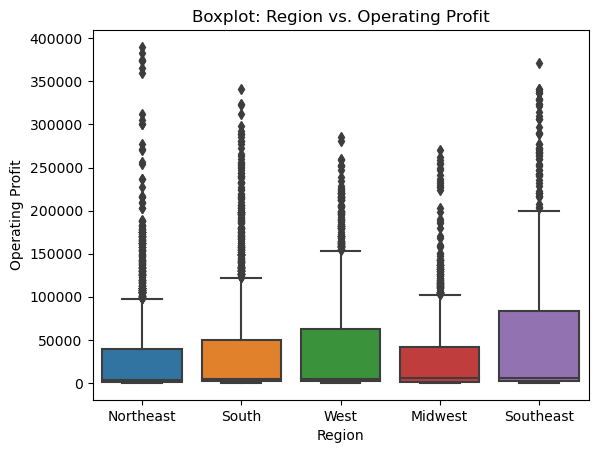

In [46]:
sns.boxplot(x='Region', y='Operating Profit', data=df)
plt.xlabel('Region')
plt.ylabel('Operating Profit')
plt.title('Boxplot: Region vs. Operating Profit')
plt.show()

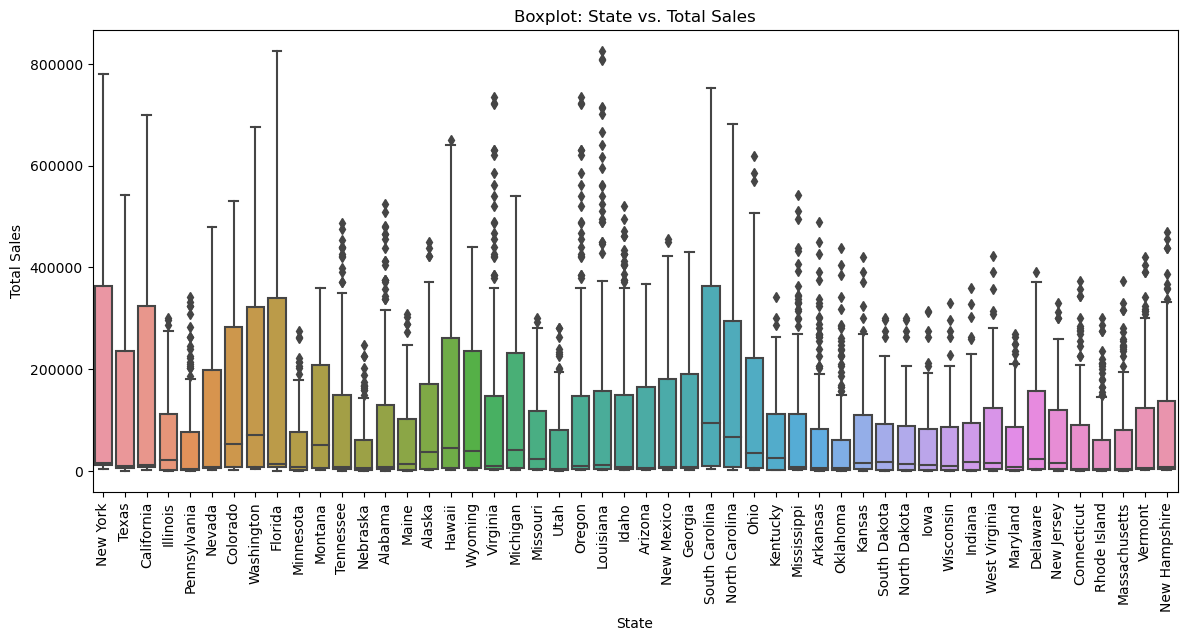

In [48]:
plt.figure(figsize=(14,6))
sns.boxplot(x='State', y='Total Sales', data=df)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.title('Boxplot: State vs. Total Sales')
plt.show()

In year of 2020 the sales were highest in the month of april, while in 2021 the sales were highest in the month of july and december. There has been a significant increase in the amount if sales in 2020 and 2021.

Products of all price range are being sold well. But Products of moderate price range are sold most compared to other.

Walmart and West gear offer wide range of choices in terms of price per unit as compared to others.

### Multivariate 

##### Which retailer has the lowest range of price per unit in Men's Apparels?

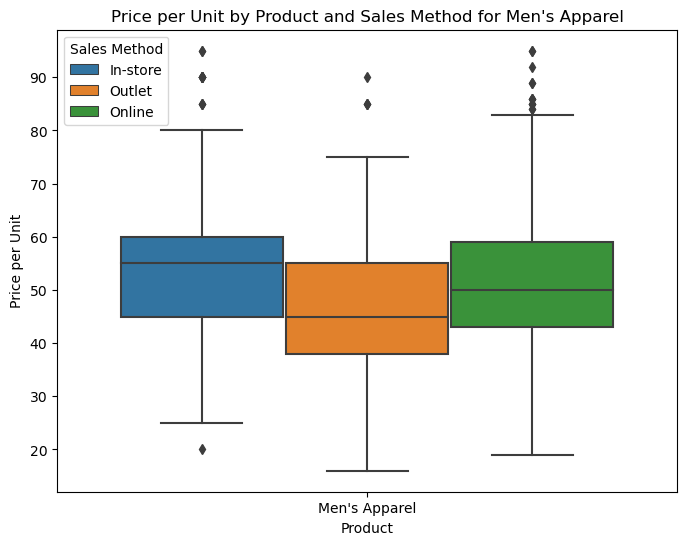

In [35]:
cond = (df['Product'] == "Men's Apparel")
fd = df[cond]

plt.figure(figsize=(8, 6))
sns.boxplot(data=fd, x='Product', y='Price per Unit', hue='Sales Method')
plt.title('Price per Unit by Product and Sales Method for Men\'s Apparel')
plt.xlabel('Product')
plt.ylabel('Price per Unit')
plt.show()

#### What is the total sales for different sales method for Women's Apparel in the Northeast region?

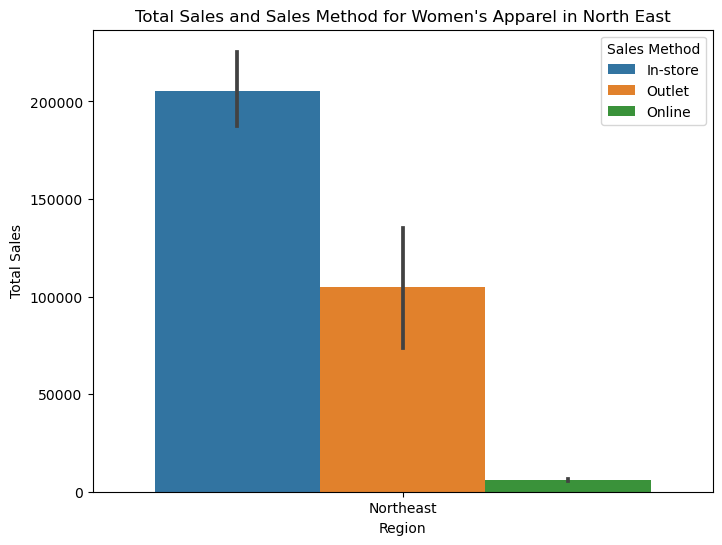

In [141]:
cond1= (df['Product'].str.contains("Women's Apparel")) & (df['Region'] == 'Northeast')
fd1 = df[cond1]

plt.figure(figsize=(8, 6))
sns.barplot(data=fd1, x='Region', y='Total Sales', hue='Sales Method')
plt.title('Total Sales and Sales Method for Women\'s Apparel in North East')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

##### What is the variation in the price per unit by sales method for Women's Street Footwear in the Northeast region?"

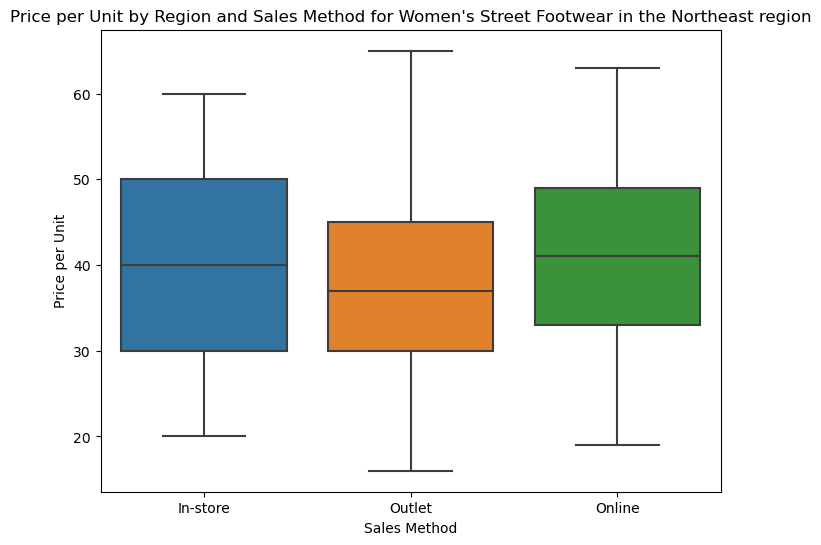

In [38]:
cond2 = (df['Product'] == "Women's Street Footwear") & (df['Region'] == 'Northeast')
fd2 = df[cond2]

plt.figure(figsize=(8, 6))
sns.boxplot(data=fd2, x='Sales Method', y='Price per Unit')
plt.title('Price per Unit by Region and Sales Method for Women\'s Street Footwear in the Northeast region')
plt.xlabel('Sales Method')
plt.ylabel('Price per Unit')
plt.show()

###### What are the total sales and sales method for Men's Athletic Footwear in the states of Northeast region

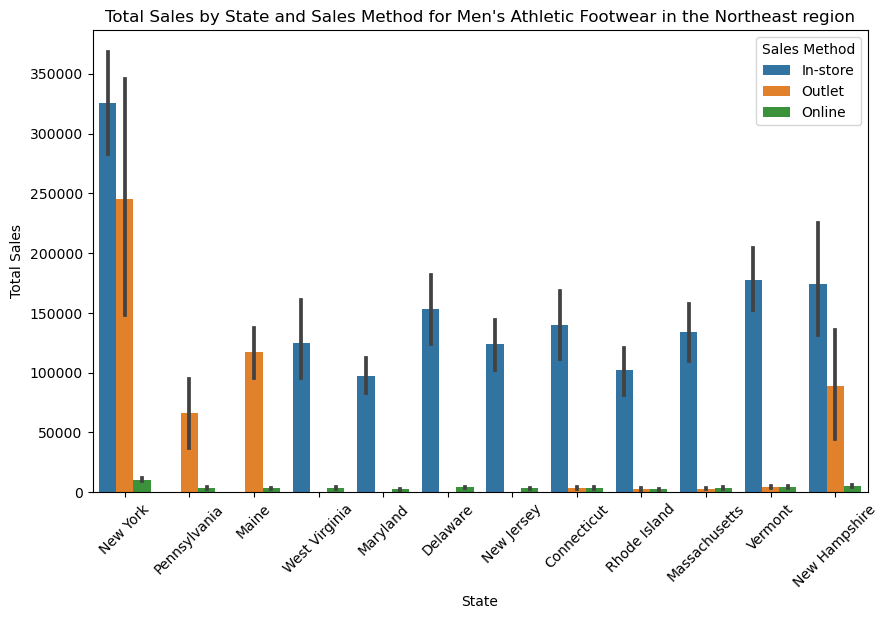

In [39]:
cond3= (df['Product'] == "Men's Athletic Footwear") & (df['Region'] == 'Northeast')
fd3 = df[cond3]

plt.figure(figsize=(10, 6))
sns.barplot(data=fd3, x='State', y='Total Sales', hue='Sales Method')
plt.title('Total Sales by State and Sales Method for Men\'s Athletic Footwear in the Northeast region')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

##### What is the relationship between operating profit and price per unit for Women's Apparel?"

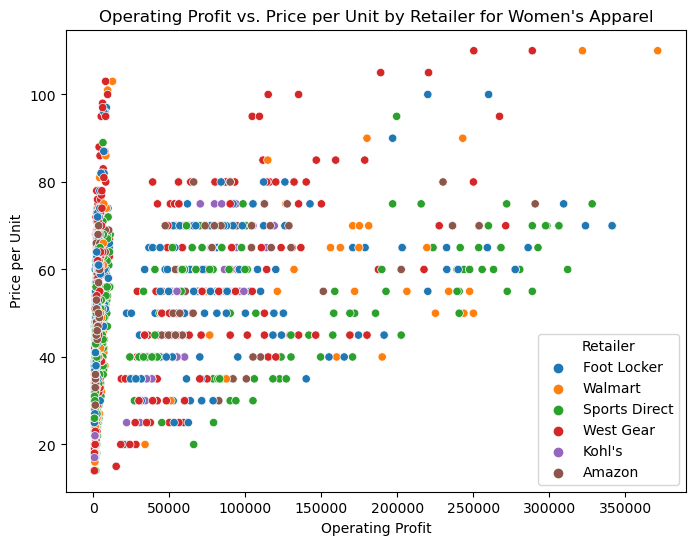

In [138]:
cond4 = (df['Product'].str.contains("Women's Apparel"))
fd4 = df[cond4]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=fd4, x='Operating Profit', y='Price per Unit', hue='Retailer')
plt.title('Operating Profit vs. Price per Unit by Retailer for Women\'s Apparel')
plt.xlabel('Operating Profit')
plt.ylabel('Price per Unit')
plt.show()

### Data Preprocessing

#### Encoding and Scaling

In [203]:
obj = list(df.select_dtypes(include=['object']).columns)  # creating a list of all columns with datatype as object
obj

['Retailer',
 'Region',
 'State',
 'City',
 'Product',
 'Price per Unit',
 'Units Sold',
 'Total Sales',
 'Operating Profit',
 'Operating Margin',
 'Sales Method']

In [204]:
for i in obj:                   # using label encoder to non numerical columns to numerical columns
    df[i]=LabelEncoder().fit_transform(df[i])
df.head(3)

0  Retailer  Region  State  City  Product  Price per Unit  Units Sold  \
0         1       1     31    35        2              75         357   
1         1       1     31    35        1              75         347   
2         1       1     31    35        5              57         347   

0  Total Sales  Operating Profit  Operating Margin  Sales Method  
0         3466              6486                69             0  
1         3419              6213                24             0  
2         3346              6175                34             0

In [205]:

s_df=pd.DataFrame(MinMaxScaler().fit_transform(df),columns=df.columns)    # sacling the data using minmax scaler
s_df.head()

0  Retailer  Region     State      City  Product  Price per Unit  Units Sold  \
0       0.2    0.25  0.632653  0.686275      0.4        0.517241    0.991667   
1       0.2    0.25  0.632653  0.686275      0.2        0.517241    0.963889   
2       0.2    0.25  0.632653  0.686275      1.0        0.393103    0.963889   
3       0.2    0.25  0.632653  0.686275      0.8        0.455172    0.938889   
4       0.2    0.25  0.632653  0.686275      0.0        0.627586    0.947222   

0  Total Sales  Operating Profit  Operating Margin  Sales Method  
0     0.987183          0.996466          0.547619           0.0  
1     0.973797          0.954525          0.190476           0.0  
2     0.953005          0.948686          0.269841           0.0  
3     0.947878          0.945306          0.269841           0.0  
4     0.978639          0.961131          0.190476           0.0

In [206]:
cor_matrix=s_df.corr()    # calculating the correlation matrix
cor_matrix

0                 Retailer    Region     State      City   Product  \
0                                                                    
Retailer          1.000000  0.267482  0.020066  0.074579 -0.000256   
Region            0.267482  1.000000 -0.158290 -0.016701 -0.000165   
State             0.020066 -0.158290  1.000000  0.095303  0.000191   
City              0.074579 -0.016701  0.095303  1.000000  0.000194   
Product          -0.000256 -0.000165  0.000191  0.000194  1.000000   
Price per Unit   -0.004417  0.207260 -0.081088 -0.004278 -0.174865   
Units Sold        0.111282  0.182756 -0.012110 -0.070865 -0.002302   
Total Sales       0.056878  0.122730 -0.028187 -0.042179 -0.034837   
Operating Profit  0.053647  0.106909 -0.018639 -0.067813 -0.034906   
Operating Margin  0.013811 -0.094031  0.030585 -0.099501  0.019369   
Sales Method     -0.073660  0.136477 -0.098631 -0.008978 -0.000109   

0                 Price per Unit  Units Sold  Total Sales  Operating Profit  \
0                                                                             
Retailer               -0.004417    0.111282     0.056878          0.053647   
Region                  0.207260    0.182756     0.122730          0.106909   
State                  -0.081088   -0.012110    -0.028187         -0.018639   
City                   -0.004278   -0.070865    -0.042179         -0.067813   
Product                -0.174865   -0.002302    -0.034837         -0.034906   
Price per Unit          1.000000    0.263738     0.449661          0.449270   
Units Sold              0.263738    1.000000     0.885325          0.866795   
Total Sales             0.449661    0.885325     1.000000          0.982214   
Operating Profit        0.449270    0.866795     0.982214          1.000000   
Operating Margin       -0.113867   -0.331799    -0.395011         -0.244872   
Sales Method           -0.160861   -0.163486    -0.266234         -0.283912   

0                 Operating Margin  Sales Method  
0                                                 
Retailer                  0.013811     -0.073660  
Region                   -0.094031      0.136477  
State                     0.030585     -0.098631  
City                     -0.099501     -0.008978  
Product                   0.019369     -0.000109  
Price per Unit           -0.113867     -0.160861  
Units Sold               -0.331799     -0.163486  
Total Sales              -0.395011     -0.266234  
Operating Profit         -0.244872     -0.283912  
Operating Margin          1.000000      0.043931  
Sales Method              0.043931      1.000000

<AxesSubplot:xlabel='0', ylabel='0'>

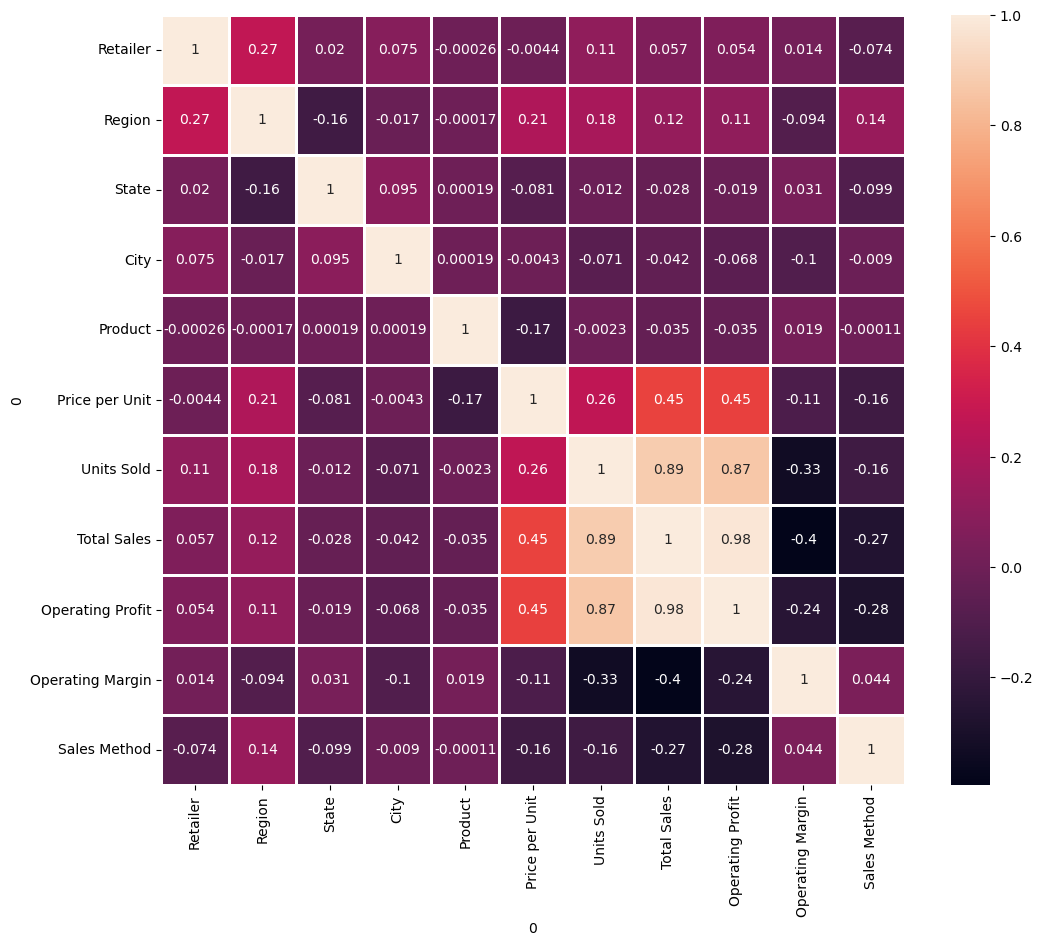

In [346]:
plt.figure(figsize=(12,10))   #visualising the correlation using heatmap
sns.heatmap(cor_matrix,annot=True, linewidths=1, linecolor='white')  

In [208]:
def correlation(df,threshold):
    col_corr=set()
    cor_matrix=df.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if(abs(cor_matrix.iloc[i,j]))>threshold:
                col_name=cor_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [209]:
selected_features=correlation(s_df,0.7)
len(set(selected_features))

2

In [210]:
selected_features

{'Operating Profit', 'Total Sales'}

In [ ]:
df=df.drop(columns='Operating Profit')      #dropping clumns with high multicollinearity and also by checking correlation with target column

In [211]:
X=s_df.drop('Units Sold',axis=1)       # determining x and y values
y=df["Units Sold"] 

In [212]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)   # Splitting the data into training and testing data

In [213]:
print(X_train.shape)
print(y_test.shape)

(6753, 10)
(2895,)


### Linear regression

In [214]:
model1=LinearRegression().fit(X_train,y_train)     #creating a model using linear regression and fitting the data
print("Intercept:",model1.intercept_)
print("slope:",model1.coef_)

Intercept: -8.759044981435125
slope: [  10.08705348   22.71814885    6.68368289  -12.71848217   -2.78596093
 -107.96361983  487.28512702 -161.20555938   70.66406902   15.5868002 ]


In [215]:
y_pred=model1.predict(X_test)   # predicting target variable / outut using the trained model

In [216]:
adj_r2train=1-(1-(model1.score(X_train,y_train)))*(935-1)/(935-7-1)   #adjusted r score since it is multi linear regression
adj_r2test=1-(1-(model1.score(X_test,y_test)))*(402-1)/(402-7-1)

In [217]:
print('adj r score training : ',adj_r2train)
print('adj r score test : ',adj_r2test)

adj r score training :  0.8274665967448129
adj r score test :  0.8147748067514065


In [218]:
RMSE=mean_squared_error(y_test,y_pred,squared=False)  # printing evaluation metrics score
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
print("RMSE:",RMSE)
print("MSE:",MSE)
print("MAE:",MAE)

RMSE: 42.40597270065962
MSE: 1798.2665206890888
MAE: 30.886606517455856
MAPE: 7749033362731.68


In [ ]:
Lscore=cross_val_score(model1,X,y,scoring='r2',cv=kf)              #cross val score
Lscore=(np.mean(Lscore))

### Decission tree

In [219]:
kf=KFold(n_splits=5)     # Creating a KFold cross-validation with 5 folds

In [220]:
param_grid={'min_samples_split':[10,20,30],            #hyperparameters for tuning using grid search
           'min_samples_leaf':[20,40,100],
            'max_depth':[3,4,5,6,7,8,9,10]}

In [221]:
dmodel=DecisionTreeRegressor(max_depth=4,random_state=42).fit(X_train,y_train)    #fitting model on train data

In [222]:
grid_cv=GridSearchCV(dmodel,param_grid,cv=kf)        #gridsearch

In [223]:
grid_cv.fit(X_train,y_train)             #hyperparameter tuning for optimal values

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(max_depth=4, random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 30]})

In [224]:
grid_cv.best_score_         #best score on optimal values

0.9694681638948556

In [225]:
grid_cv.best_params_          #getting best parameters

{'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 10}

In [226]:
grid_cv.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=10,
                      random_state=42)

In [227]:
dmodel2=DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=10).fit(X_train,y_train)
y_pred2=dmodel2.predict(X_test)           #fitting model on optimal hyperparameters


In [228]:
print("R_square Training data:",dmodel2.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",dmodel2.score(X_test,y_test))

R_square Training data: 0.9793195062363219
R_square Test data: 0.9717610024887451


In [229]:
RMSE=mean_squared_error(y_test,y_pred2,squared=False)     #evaluation metrics
MSE=mean_squared_error(y_test,y_pred2) 
MAE=mean_absolute_error(y_test,y_pred2)
print("M2 RMSE:",RMSE)
print("M2 MSE:",MSE)
print("M2 MAE:",MAE)

M2 RMSE: 16.704201266767896
M2 MSE: 279.0303399606902
M2 MAE: 9.277961424030648
M2 MAPE: 5522548765860.278


In [ ]:
DTscore=cross_val_score(dmodel2,X,y,scoring='r2',cv=kf)
DTscore=(np.mean(DTscore))

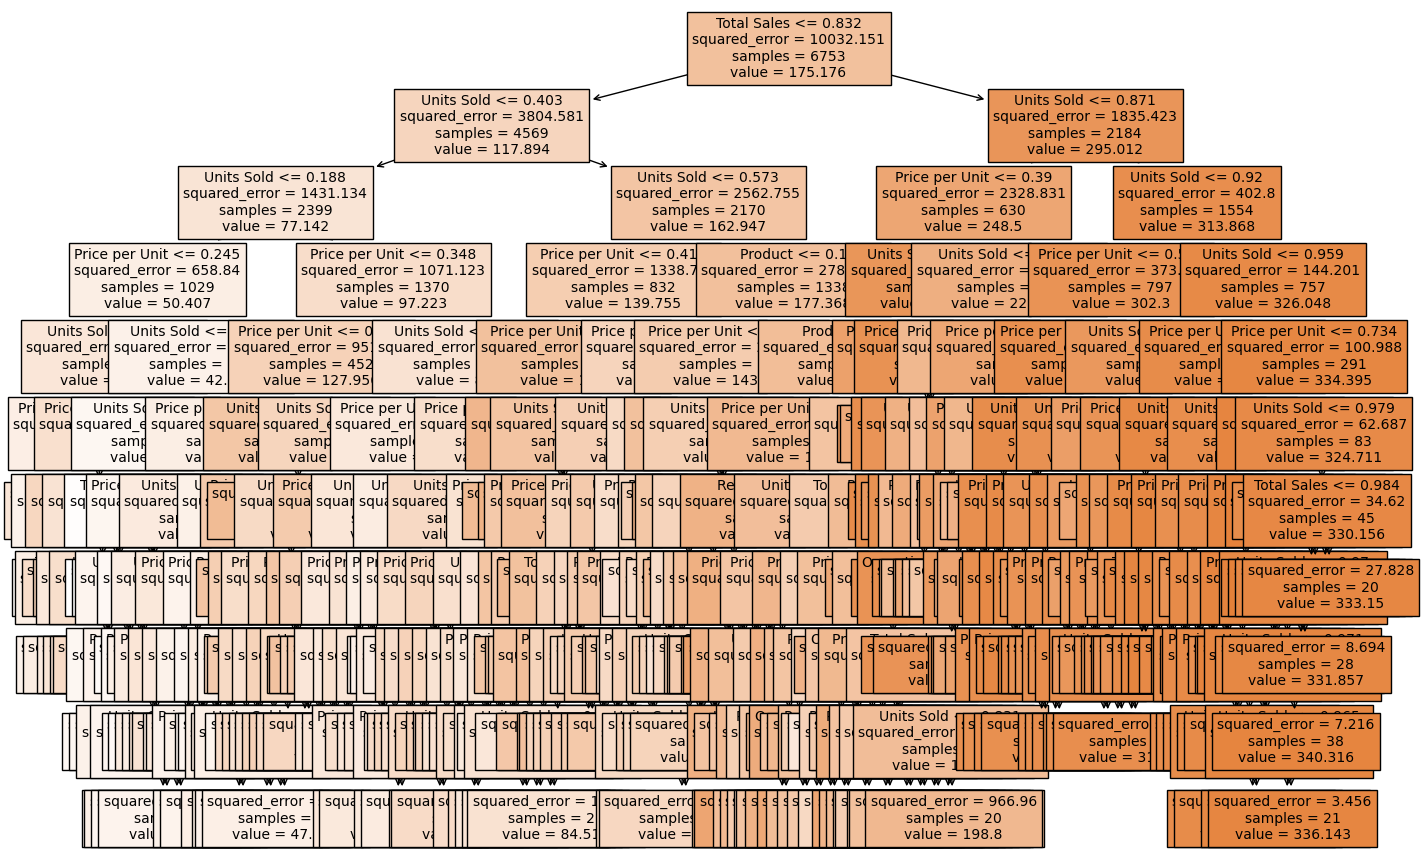

In [230]:
from sklearn import tree              #plotting the decision tree
plt.figure(figsize=(16,11))
tree.plot_tree(dmodel2,feature_names=df.columns,class_names=True,filled=True,fontsize=10)
plt.show()

### random Forest

In [231]:
param_grid2 = {'n_estimators': [20,40,50,80],             
    'max_depth': [4,5,6,8,9,10],
    'min_samples_split': [10,20,30],
    'min_samples_leaf': [10, 20, 40,],}                     #hyper parameters

In [232]:
rf=RandomForestRegressor(random_state=42)         # RF model

In [233]:
grid_cv2=GridSearchCV(rf,param_grid2,cv=5)          #hyperparameter tuning using grid search

In [234]:
grid_cv2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 8, 9, 10],
                         'min_samples_leaf': [10, 20, 40],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [20, 40, 50, 80]})

In [235]:
grid_cv2.best_score_

0.9868529173727119

In [236]:
grid_cv2.best_params_     #best parameters or optimal values

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 50}

In [237]:
grid_cv2.best_estimator_  #getting best param estimates

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=50, random_state=42)

In [238]:
rfmodel=RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,n_estimators=50)
rfmodel.fit(X,y)
y_pred3=rfmodel.predict(X_test)
print("R_square Training data:",rfmodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",rfmodel.score(X_test,y_test))

R_square Training data: 0.9923777367270011
R_square Test data: 0.9928059120994005


In [239]:
RMSE=mean_squared_error(y_test,y_pred3,squared=False)          #evalustion metrics
MSE=mean_squared_error(y_test,y_pred3)
MAE=mean_absolute_error(y_test,y_pred3)
print("M3 RMSE:",RMSE)
print("M3 MSE:",MSE)
print("M3 MAE:",MAE)

M3 RMSE: 8.431191361011184
M3 MSE: 71.08498776598961
M3 MAE: 3.5459716175547125
M3 MAPE: 3939699657930.1904


In [ ]:
RFscore=cross_val_score(rfmodel,X,y,scoring='r2',cv=kf)
RFscore=(np.mean(RFscore))

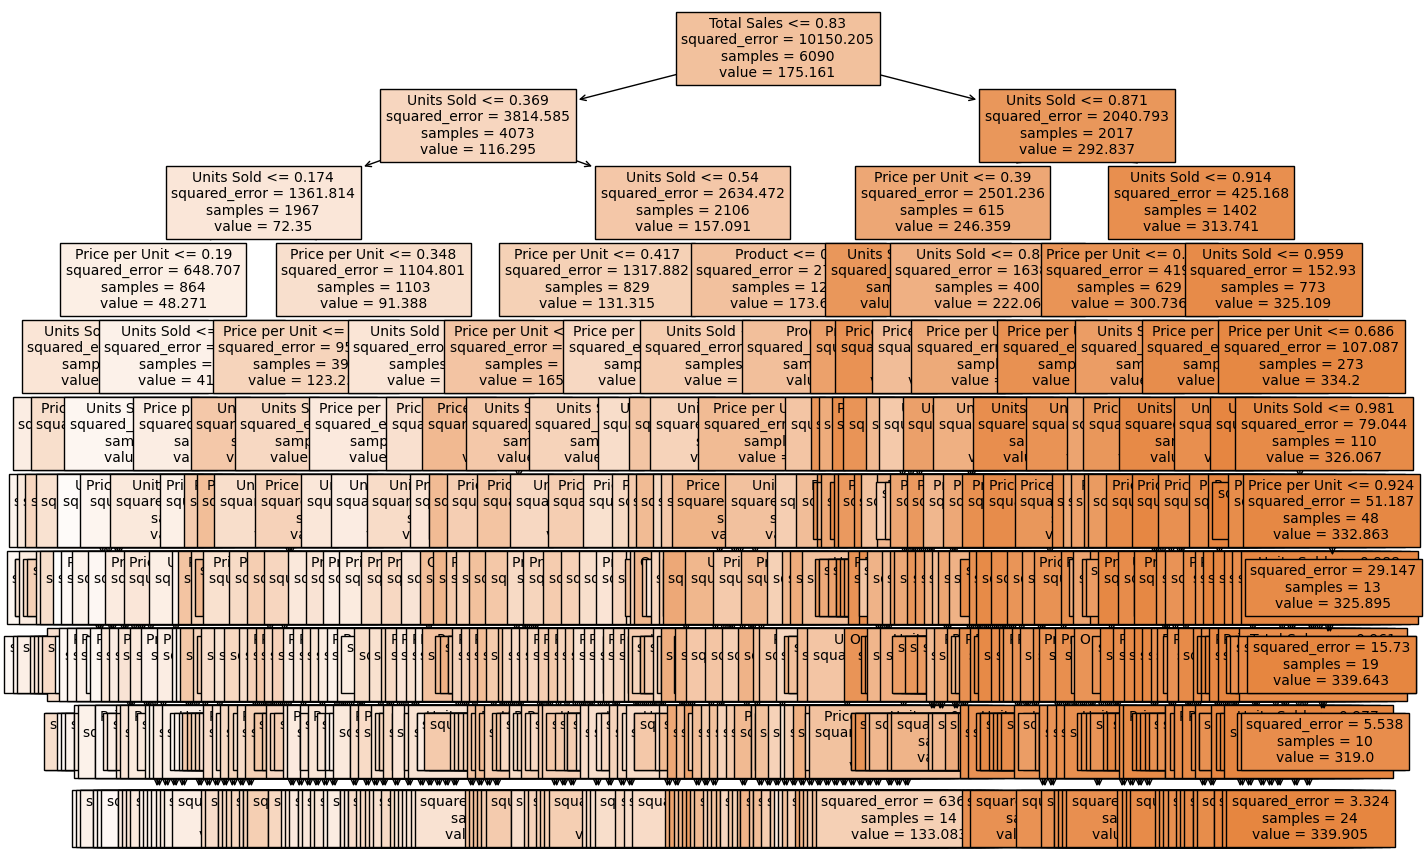

In [240]:
from sklearn import tree                         #Plotting the random forest
plt.figure(figsize=(16,11))
tree.plot_tree(rfmodel[0],feature_names=df.columns,class_names=True,filled=True,fontsize=10)
plt.show()

### KN Regressor

In [241]:
for i in range(25,36):                        # checking optimal value of n_neighbors
    score = cross_val_score(KNeighborsRegressor(n_neighbors=i), X,y, cv=kf)
    print(f"n_neighbors: {i}, Mean Score: {np.mean(score)}")

n_neighbors: 25, Mean Score: 0.005272692106011645
n_neighbors: 26, Mean Score: 0.007381917832711649
n_neighbors: 27, Mean Score: 0.009872712035966935
n_neighbors: 28, Mean Score: 0.013010621772662634
n_neighbors: 29, Mean Score: 0.016795682516721235
n_neighbors: 30, Mean Score: 0.019191236840633397
n_neighbors: 31, Mean Score: 0.02168681194491704
n_neighbors: 32, Mean Score: 0.025110003295044293
n_neighbors: 33, Mean Score: 0.02702806598736307
n_neighbors: 34, Mean Score: 0.02953665488764521
n_neighbors: 35, Mean Score: 0.03257679963970987


In [260]:
kmodel=KNeighborsRegressor(n_neighbors=35).fit(X_train,y_train)  #fitting the model

In [261]:
y_pred4=kmodel.predict(X_test)

In [262]:
print("R_square Training data:",kmodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",kmodel.score(X_test,y_test))

R_square Training data: 0.8580879942527904
R_square Test data: 0.8515261345105967


In [263]:
RMSE=mean_squared_error(y_test,y_pred4,squared=False)    #evaluation metrics
MSE=mean_squared_error(y_test,y_pred4)
MAE=mean_absolute_error(y_test,y_pred4)
print("M4 RMSE:",RMSE)
print("M4 MSE:",MSE)
print("M4 MAE:",MAE)

M4 RMSE: 38.30240854436705
M4 MSE: 1467.0745002996016
M4 MAE: 27.132918825561312
M4 MAPE: 64937173013454.93


In [ ]:
Kscore=cross_val_score(kmodel,X,y,scoring='r2',cv=kf)
Kscore=(np.mean(Kscore))

### Stacking

In [264]:
level1=[]                                             # base models for stacking and the meta model
level1.append(('lr',LinearRegression()))
level1.append(('KNN',KNeighborsRegressor(n_neighbors=35)))
level1.append(('SVM',SVR()))
level1.append(('DT',DecisionTreeRegressor(max_depth=10 ,min_samples_leaf=20,min_samples_split=10, random_state=42)))
level1.append(('RF',RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,n_estimators=50, random_state=42)))
level2=LinearRegression()
stack_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf)

In [265]:
smodel=stack_model.fit(X_train,y_train)       #fitting hte stacking model on training data
y_preds=smodel.predict(X_test)

In [249]:
print('R Score:', np.mean(score))

R Score: 0.827049920367015


In [250]:
print("R_square Training data:",smodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",smodel.score(X_test,y_test))

R_square Training data: 0.9936341955241139
R_square Test data: 0.9909354901433816


In [251]:
RMSE=mean_squared_error(y_test,y_preds,squared=False)        # Evaluation metrics
MSE=mean_squared_error(y_test,y_preds)
MAE=mean_absolute_error(y_test,y_preds)
print("M5 RMSE:",RMSE)
print("M5 MSE:",MSE)
print("M5 MAE:",MAE)

M5 RMSE: 9.4639674803694
M5 MSE: 89.56668046948951
M5 MAE: 4.622833065063423
M5 MAPE: 1327109473038.5588


In [ ]:
STscore=cross_val_score(stack_model,X,y,scoring='r2',cv=kf)          #cross val score
STscore=(np.mean(STscore))`

#### Model Cross val scores comparision


In [257]:
model=['Stacked','Random forest','Decision tree','Linear regression','K neighbour']     #making list of model names and scores
mscores=[STscore,RFscore,DTscore,Lscore,Kscore]

In [258]:
dfscores = pd.DataFrame({'Model': model, 'Score': mscores})
dfscores.sort_values(by='Score',ascending=False)

Model     Score
1      Random forest  0.864343
0            Stacked  0.827050
2      Decision tree  0.791286
3  Linear regression  0.454131
4        K neighbour  0.032577

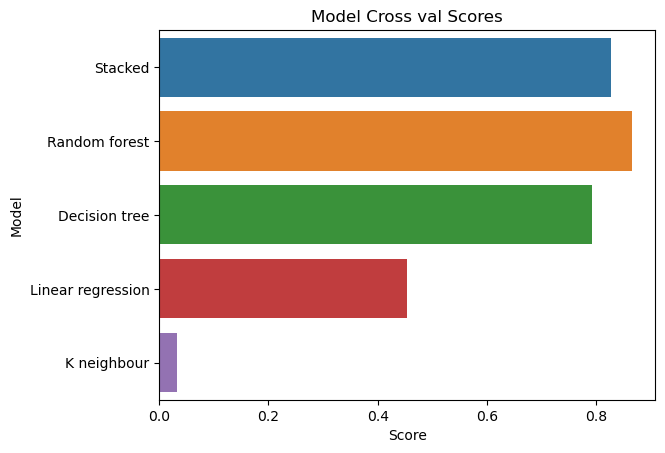

In [259]:
sns.barplot(y=dfscores['Model'],x= dfscores['Score'],orient='h') #plotting graph to compare cross val score
plt.ylabel('Model')
plt.xlabel('Score')
plt.title('Model Cross val Scores')
plt.show()